In [1]:
# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy

#Import custom module
import sys
import os
sys.path.insert(0,os.path.abspath("../scripts"))
import eda_functions as eda
import importlib
importlib.reload(eda)


# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Set visualization style
sns.set(style="whitegrid")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Descriptive Statistics

## Basic Statistics for Textual Lengths

In [3]:
headline_stats = eda.headline_length(df)
print(headline_stats)




count    1407328.00
mean          11.42
std            6.35
min            1.00
25%            7.00
50%           10.00
75%           13.00
max           77.00
Name: headline_length, dtype: float64


Number of Articles per Publisher

In [4]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


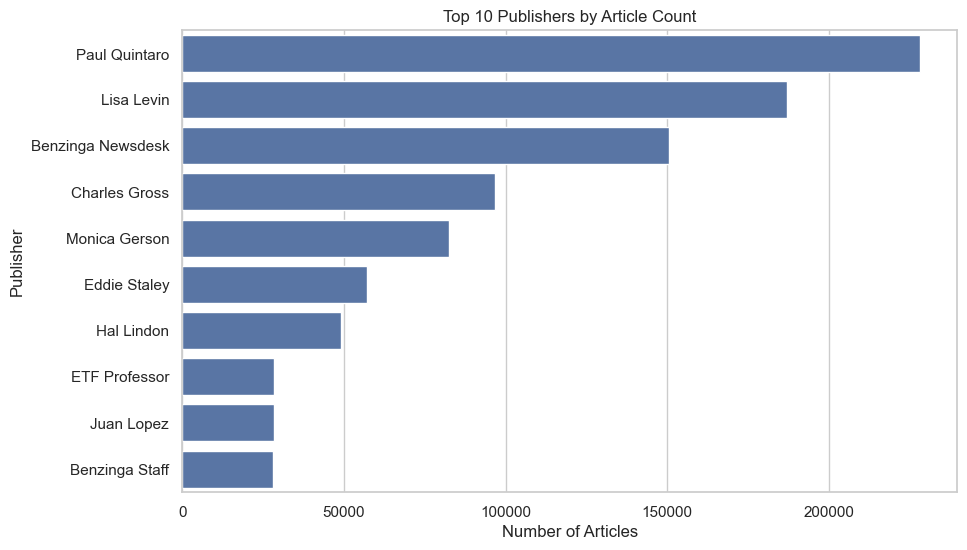

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x=publisher_counts.values[:10], y=publisher_counts.index[:10])
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


Analysis of Publication Dates

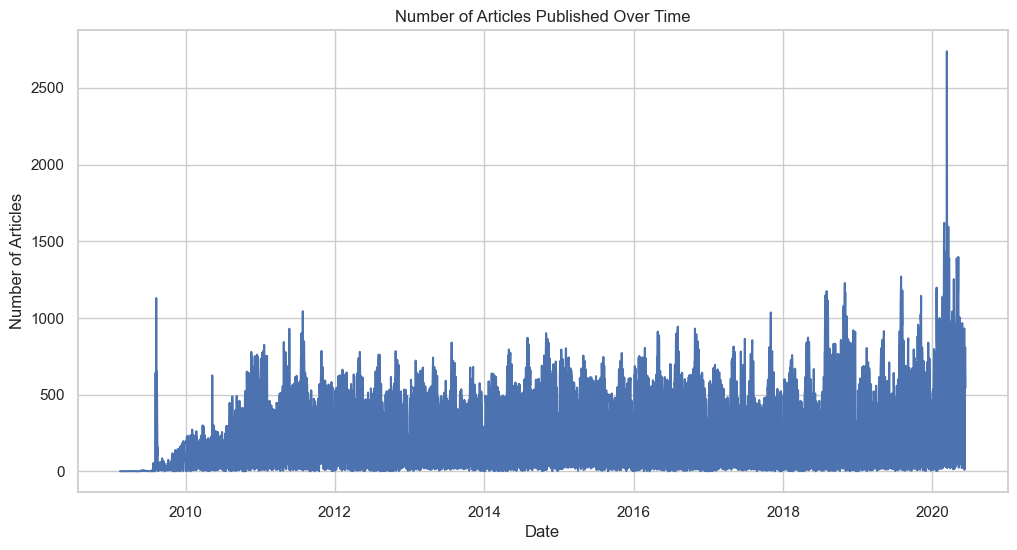

In [6]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601', utc=True)
df['day'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()

# Plot articles per day
articles_per_day = df['day'].value_counts().sort_index()

plt.figure(figsize=(12,6))
articles_per_day.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


Text Analysis

Sentiment Analysis

In [7]:
sentiment_stats = eda.sentiment_analysis(df)
print(sentiment_stats)

count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


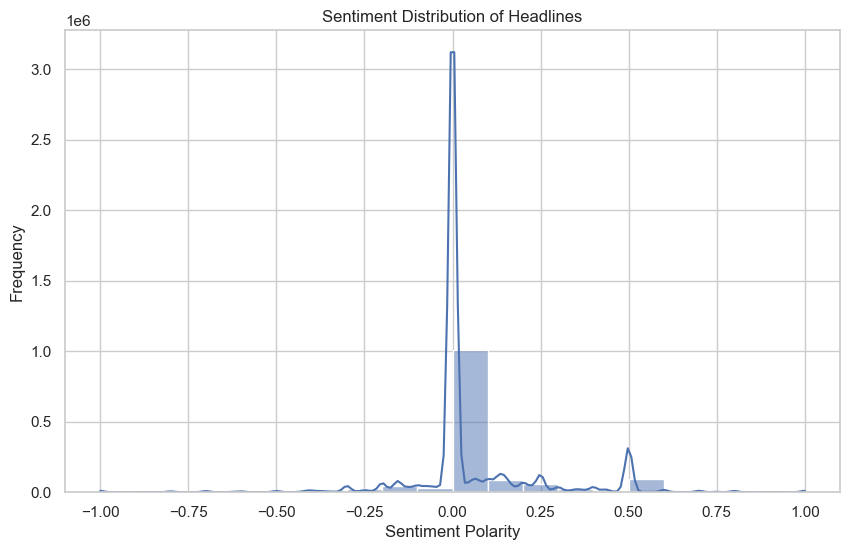

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


Topic Modeling

In [4]:
# Get the top 30 most common keywords
common_keywords = eda.common_keywords(df,30)

# Display common keywords
print("Common Keywords:")
for keyword, frequency in common_keywords:
    print(f"{keyword}: {frequency} times", end=' | ')


Common Keywords:
0: 255841 times | vs: 162099 times | stocks: 161776 times | est: 140604 times | eps: 128897 times | market: 120558 times | 1: 119001 times | shares: 114313 times | reports: 108710 times | update: 91723 times | earnings: 87399 times | sales: 79645 times | top: 79632 times | benzinga: 74516 times | pt: 73068 times | 2: 72579 times | week: 69572 times | announces: 66591 times | 5: 64477 times | price: 64407 times | buy: 64371 times | mid: 62263 times | downgrades: 61959 times | trading: 61182 times | 4: 60840 times | 3: 57924 times | raises: 57802 times | 52: 56972 times | upgrades: 56811 times | target: 54714 times | 

Time Series Analysis

Publication Frequency Over Time

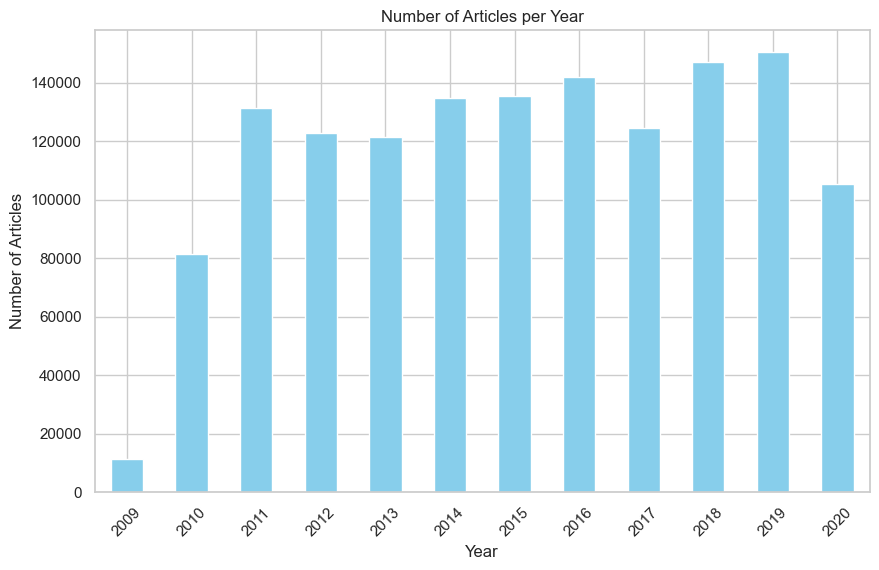

In [11]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'],format='ISO8601')

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year to see the number of articles published per day
articles_per_year = df.groupby('year').size()


# Plotting the number of articles per year
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()



Analysis of Publishing Times

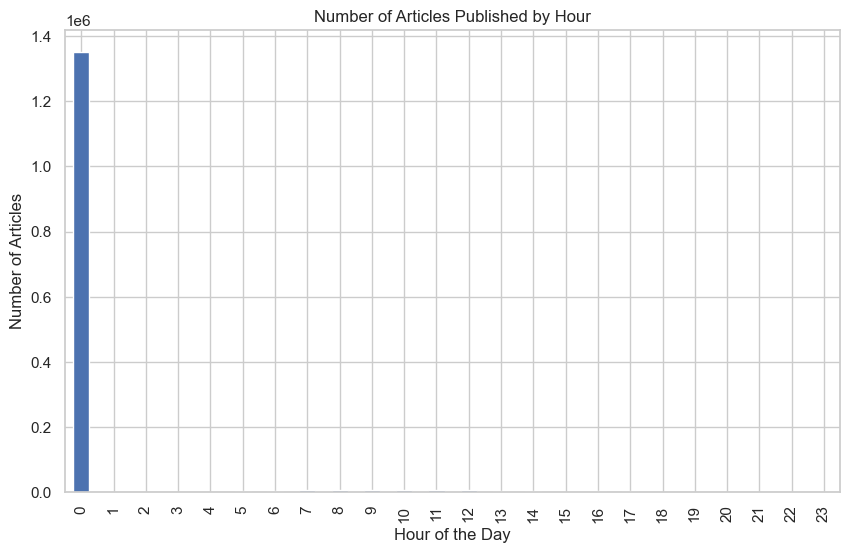

In [12]:
df['hour'] = df['date'].dt.hour
articles_per_hour = df.groupby('hour').size()

plt.figure(figsize=(10,6))
articles_per_hour.plot(kind='bar')
plt.title('Number of Articles Published by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()


Publisher Analysis

Top Publishers

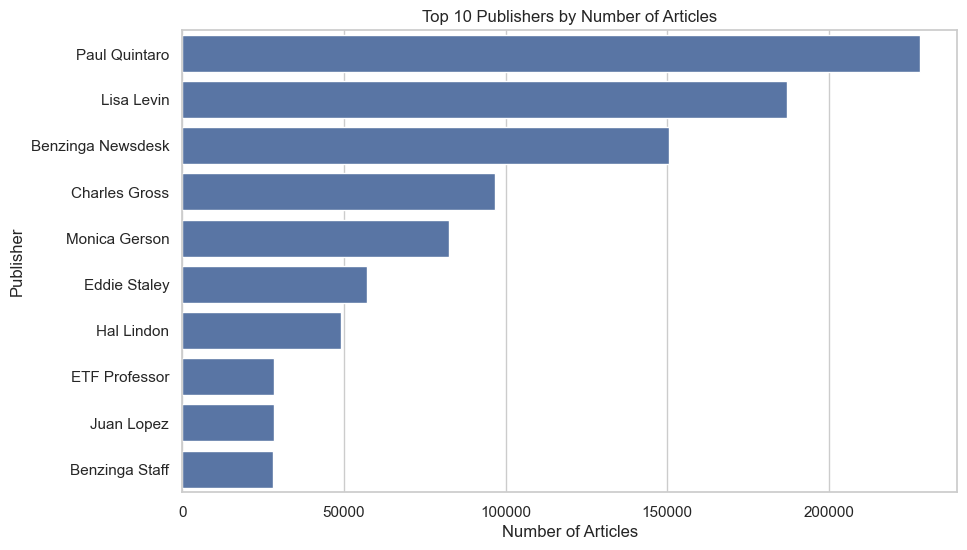

In [13]:
top_publishers = df['publisher'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


Difference in the Type of News they Report

In [5]:
# Apply the sentiment analysis function to each headline
df['sentiment'] = df['headline'].apply(eda.classify_sentiment)

# Group by publisher and sentiment, then count the occurrences
publisher_sentiment = df.groupby(['publisher', 'sentiment']).size().unstack(fill_value=0)

# Display the sentiment distribution for each publisher
print(publisher_sentiment)


sentiment                   negative  neutral  positive
publisher                                              
47ertrends                         0       18         0
AARP                               0        2         5
ABNNewswire                        8        5         0
Aakin                              0        1         4
Aaron Jackson.Ed                   1        0        15
...                              ...      ...       ...
vic@forextraininggroup.com         0        1         0
vishwanath@benzinga.com           13     1732        85
vivek.proactive@gmail.com          3      114         3
wallstreet1928                     1        6         1
webmaster                       1979    14776      3558

[1034 rows x 3 columns]


Unique Domains for Email Addresses

In [14]:
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)
domain_counts = df['domain'].value_counts()
print(domain_counts.head(10))


domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
